In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Iterable

# Using an extended version of Karpathy's micrograd library to work with gradients. Thanks Andrej!  
from micrograd.engine import Value

In [2]:
# Set target values for the regression and generate data around them
target_slope = 0.5
target_intercept = 3

np.random.seed(2023)
rng = np.random.default_rng(2023)

class_size = 1000

X1_pos = rng.normal(loc=4.0, scale=2.0, size=class_size)
X2_pos = rng.normal(loc=10.0, scale=2.0, size=class_size)

X1_neg = rng.normal(loc=12.0, scale=2.0, size=class_size)
X2_neg = rng.normal(loc=4.0, scale=2.0, size=class_size)

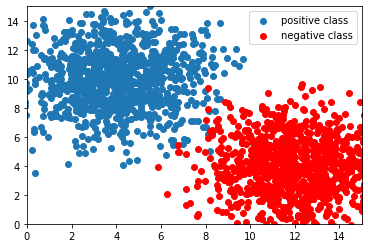

In [3]:
plt.scatter(X1_pos, X2_pos)
plt.scatter(X1_neg, X2_neg, c='red')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.legend(['positive class', 'negative class'])
plt.show()

In [4]:
labels = np.array([1] * class_size + [0] * class_size)

pos_features = np.hstack([X1_pos.reshape(class_size, 1), X2_pos.reshape(class_size, 1)])
neg_features = np.hstack([X1_neg.reshape(class_size, 1), X2_neg.reshape(class_size, 1)])
data = np.concatenate([pos_features, neg_features])
data.shape

(2000, 2)

In [5]:
X_train, X_test = data[:1750], data[1750:]
Y_train, Y_test = labels[:1750], labels[1750:]
X_train.shape

(1750, 2)

In [6]:
class LogisticRegression:
    def __init__(self):
        self.intercept = Value(0.1)
        self.coeffs = []
         
    # Set gradients to zero     
    def zero_grad(self):
        for param in self.coeffs + [self.intercept]:
            param.grad = 0

    # Binary cross-entropy / Log loss
    def loss(self, 
             Y_true: Iterable,
             Y_prob: Iterable) -> Value:
        result = 0
        for y_true, y_prob in zip(Y_true, Y_prob):
            result -= y_true * y_prob.log() + (1 - y_true) * (1 - y_prob).log()
        return result
    
    # Use current parameters to produce predictions
    def predict(self, X: Iterable) -> Iterable:
        preds = []
        for x in X:
            logit = 0
            for idx, val in enumerate(x):
                logit += self.coeffs[idx] * val
            logit += self.intercept
            
            # Apply sigmoid function to the output
            y = logit.sigmoid()
            preds.append(y)
        y = np.array(y)
        return preds
    
    def fit(self,
            X: Iterable,
            Y: Iterable,
            n_iter = 5000,
            batch_size = 100,
            eps = 1e-05,
            lr = 0.0001):
        X = np.array(X)
        Y = np.array(Y)  
        self.is_fit = True
        # Populate self.coeffs 
        n_coeffs = X.shape[1] if len(X.shape) > 1 else 1
        self.coeffs = [Value(0.1) for _ in range(n_coeffs)]
        
        # Gradient descent optimization (not Stochastic!) 
        for num in range(n_iter):
            # Generate (mini-)batch
            batch_indices = np.random.randint(0, X.shape[0], size=batch_size)
            X_batch = X[batch_indices]
            Y_batch = Y[batch_indices]
            
            # Forward pass, get predictions and calculate loss
            preds = self.predict(X_batch)
            loss_value = self.loss(Y_batch, preds)
            if num % 100 == 0:
                print(f'{num}: loss = {round(loss_value.data, 3)}')
                
            # Remove gradients from the previous backward passes
            self.zero_grad()
            loss_value.backward()
            steps = []
            
            # "Nudge" every parameter in the opposite direction from gradient
            for p in self.coeffs + [self.intercept]:
                step = lr * p.grad
                p.data -= step
                steps.append(step)
                
            if np.all(np.abs(steps) <= eps):
                print('Early stop')
                break

In [7]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
# lr.coeffs.data, lr.intercept.data

0: loss = 92.052
100: loss = 10.171
200: loss = 5.387
300: loss = 5.082
400: loss = 4.222
500: loss = 4.343
600: loss = 3.473
700: loss = 3.585
800: loss = 2.265
900: loss = 4.518
1000: loss = 3.101
1100: loss = 3.852
1200: loss = 3.05
1300: loss = 2.87
1400: loss = 2.599
1500: loss = 1.586
1600: loss = 1.128
1700: loss = 1.488
1800: loss = 1.575
1900: loss = 4.137
2000: loss = 1.728
2100: loss = 1.919
2200: loss = 1.069
2300: loss = 3.811
2400: loss = 1.329
2500: loss = 2.48
2600: loss = 4.023
2700: loss = 2.33
2800: loss = 0.981
2900: loss = 1.232
3000: loss = 1.298
3100: loss = 4.436
3200: loss = 6.013
3300: loss = 1.413
3400: loss = 2.165
3500: loss = 2.307
3600: loss = 0.854
3700: loss = 2.047
3800: loss = 1.151
3900: loss = 2.801
4000: loss = 2.809
4100: loss = 2.412
4200: loss = 1.775
4300: loss = 4.559
4400: loss = 1.235
4500: loss = 1.001
4600: loss = 1.186
4700: loss = 0.566
4800: loss = 1.623
4900: loss = 1.774


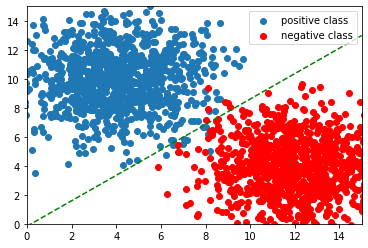

In [25]:
plt.scatter(X1_pos, X2_pos)
plt.scatter(X1_neg, X2_neg, c='red')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.legend(['positive class', 'negative class'])

x_vals = np.array(plt.gca().get_xlim())

# Calculate the intercept and gradient of the decision boundary.
# The decision boundary for 2 features is actually a plane 
c = -lr.intercept.data / lr.coeffs[1].data
m = -lr.coeffs[0].data / lr.coeffs[1].data

y_vals = m * x_vals + c
plt.plot(x_vals, y_vals, 'g--', label='decision boundary')
# plt.legend(['decision boundary'])

plt.show()